In [1]:
%matplotlib inline 

import math
import copy

import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

import model
import model_utils
import preprocessing_utils

#to be put under model.py when I refactor
from tqdm.notebook import tqdm

In [2]:
torch.manual_seed(1234)

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

epochs = 500
batch_size = 16
lr = 0.0005920310461116504
patience = 10

num_timesteps_inputs = [6,7,8,9,10,11] # Default is 30 minutes
num_timesteps_outputs = [2,3,4,5,6] # Default is 10 minutes
print(device)

cuda


In [4]:
def train(x_input, x_target, batch_size):
    """
    Train function per epoch
    """
    
    stgcn.train()
    
    num_samples = x_input.shape[0]
    shuffled_order = torch.randperm(num_samples)
    
    training_loss = []
    
    for i in range(math.ceil(num_samples / batch_size)):

        optimizer.zero_grad()
        
        start = i * batch_size
        batch = shuffled_order[start:start+batch_size]
        
        x_batch = x_input[batch].to(device = device)
        y_batch = x_target[batch].to(device = device)
        
        out = stgcn(adj_mat, x_batch)
        loss = loss_criterion(out, y_batch)
        loss.backward()
        optimizer.step()
        
        training_loss.append(loss.detach().cpu().numpy())
        
    return sum(training_loss) / len(training_loss)

def get_test_rmse(pred, actual, stds, means, loss_criterion):
    pred = pred.to(device = 'cpu')
    denorm_pred = preprocessing_utils.denormalize(pred, stds[0], means[0])
    denorm_actual = preprocessing_utils.denormalize(actual, stds[0], means[0])
    mse_loss = loss_criterion(denorm_pred, denorm_actual).to(device='cpu')
    rmse_loss = mse_loss.sqrt()
    return rmse_loss

In [5]:
raw_trunc_dir = "./data/raw/trunc/"
process_dir = "./data/processed/"

# overwrite = False means that the processing function will only run if the process data files do not exist
# overwrite = True => functions will run regardless
preprocessing_utils.processed(raw_trunc_dir, process_dir, overwrite=False)
A, X, metadata, cat2index, means, stds = preprocessing_utils.load(process_dir)

split_line1 = int(X.shape[2] * 0.6)
split_line2 = int(X.shape[2] * 0.8)

train_original_data = X[:, :, :split_line1]
val_original_data = X[:, :, split_line1:split_line2]
test_original_data = X[:, :, split_line2:]



Input Timesteps: 6, Output Timesteps: 2


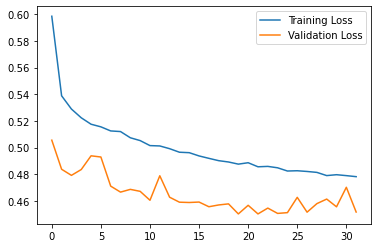

Normalized_test_loss: 0.4177810549736023
Denormalized_test_loss: 0.6505247950553894
Saved model to ./saved_models/timesteps/input6_output2_loss0.6505247950553894


Input Timesteps: 6, Output Timesteps: 3


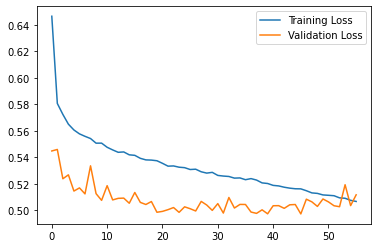

Normalized_test_loss: 0.4557913541793823
Denormalized_test_loss: 0.6777992844581604
Saved model to ./saved_models/timesteps/input6_output3_loss0.6777992844581604


Input Timesteps: 6, Output Timesteps: 4


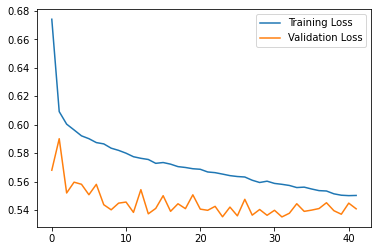

Normalized_test_loss: 0.4804089665412903
Denormalized_test_loss: 0.6972184777259827
Saved model to ./saved_models/timesteps/input6_output4_loss0.6972184777259827


Input Timesteps: 6, Output Timesteps: 5


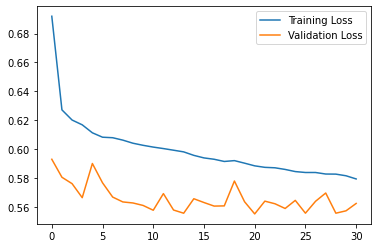

Normalized_test_loss: 0.5020248889923096
Denormalized_test_loss: 0.7115980386734009
Saved model to ./saved_models/timesteps/input6_output5_loss0.7115980386734009


Input Timesteps: 6, Output Timesteps: 6


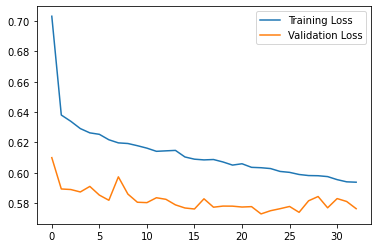

Normalized_test_loss: 0.5086449384689331
Denormalized_test_loss: 0.7189791202545166
Saved model to ./saved_models/timesteps/input6_output6_loss0.7189791202545166


Input Timesteps: 7, Output Timesteps: 2


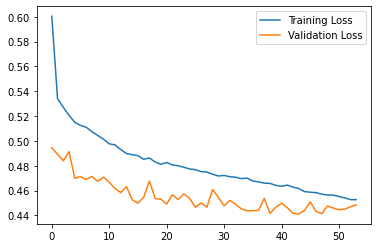

Normalized_test_loss: 0.4090633690357208
Denormalized_test_loss: 0.6424267292022705
Saved model to ./saved_models/timesteps/input7_output2_loss0.6424267292022705


Input Timesteps: 7, Output Timesteps: 3


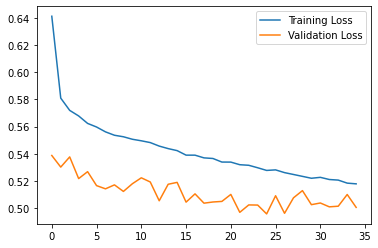

Normalized_test_loss: 0.453838586807251
Denormalized_test_loss: 0.6777302622795105
Saved model to ./saved_models/timesteps/input7_output3_loss0.6777302622795105


Input Timesteps: 7, Output Timesteps: 4


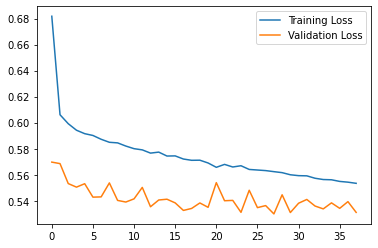

Normalized_test_loss: 0.4800889492034912
Denormalized_test_loss: 0.6963263750076294
Saved model to ./saved_models/timesteps/input7_output4_loss0.6963263750076294


Input Timesteps: 7, Output Timesteps: 5


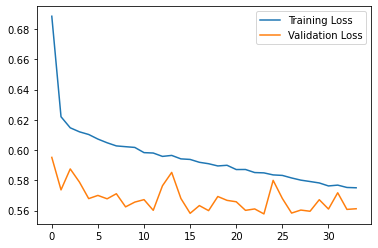

Normalized_test_loss: 0.4953401982784271
Denormalized_test_loss: 0.7093619704246521
Saved model to ./saved_models/timesteps/input7_output5_loss0.7093619704246521


Input Timesteps: 7, Output Timesteps: 6


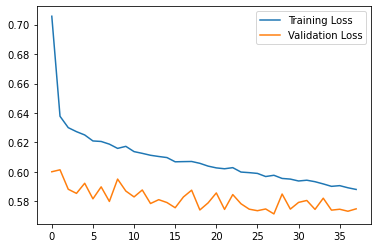

Normalized_test_loss: 0.5113873481750488
Denormalized_test_loss: 0.7188355326652527
Saved model to ./saved_models/timesteps/input7_output6_loss0.7188355326652527


Input Timesteps: 8, Output Timesteps: 2


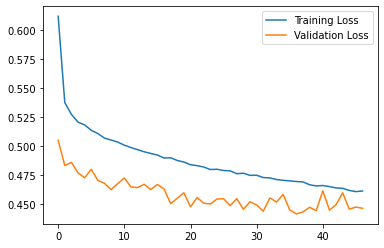

Normalized_test_loss: 0.40902450680732727
Denormalized_test_loss: 0.6440409421920776
Saved model to ./saved_models/timesteps/input8_output2_loss0.6440409421920776


Input Timesteps: 8, Output Timesteps: 3


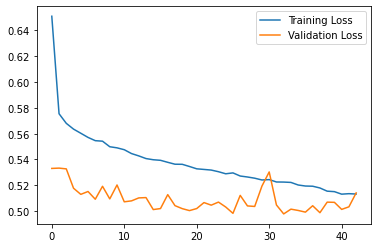

Normalized_test_loss: 0.456501305103302
Denormalized_test_loss: 0.6787509322166443
Saved model to ./saved_models/timesteps/input8_output3_loss0.6787509322166443


Input Timesteps: 8, Output Timesteps: 4


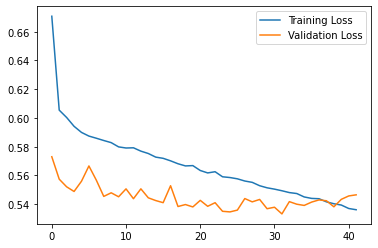

Normalized_test_loss: 0.4778253138065338
Denormalized_test_loss: 0.6965036988258362
Saved model to ./saved_models/timesteps/input8_output4_loss0.6965036988258362


Input Timesteps: 8, Output Timesteps: 5


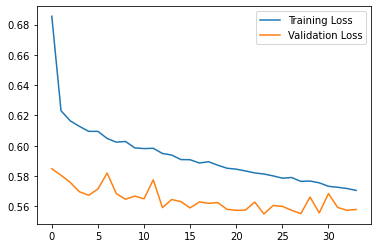

Normalized_test_loss: 0.498579740524292
Denormalized_test_loss: 0.7097769975662231
Saved model to ./saved_models/timesteps/input8_output5_loss0.7097769975662231


Input Timesteps: 8, Output Timesteps: 6


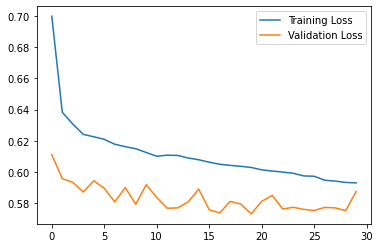

Normalized_test_loss: 0.5107272863388062
Denormalized_test_loss: 0.7183626890182495
Saved model to ./saved_models/timesteps/input8_output6_loss0.7183626890182495


Input Timesteps: 9, Output Timesteps: 2


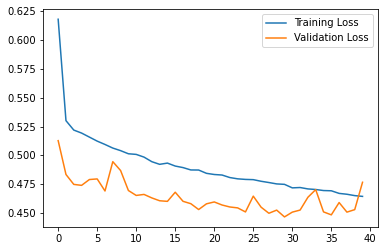

Normalized_test_loss: 0.4133540093898773
Denormalized_test_loss: 0.6464388370513916
Saved model to ./saved_models/timesteps/input9_output2_loss0.6464388370513916


Input Timesteps: 9, Output Timesteps: 3


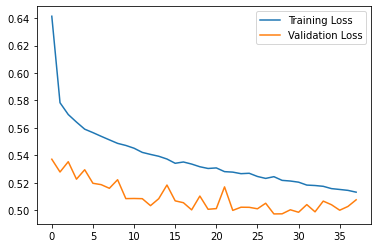

Normalized_test_loss: 0.44963380694389343
Denormalized_test_loss: 0.6759948134422302
Saved model to ./saved_models/timesteps/input9_output3_loss0.6759948134422302


Input Timesteps: 9, Output Timesteps: 4


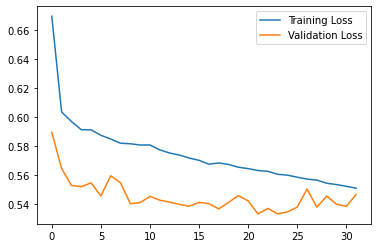

Normalized_test_loss: 0.4786812961101532
Denormalized_test_loss: 0.695469081401825
Saved model to ./saved_models/timesteps/input9_output4_loss0.695469081401825


Input Timesteps: 9, Output Timesteps: 5


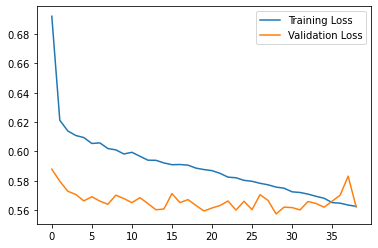

Normalized_test_loss: 0.4989871382713318
Denormalized_test_loss: 0.7100393176078796
Saved model to ./saved_models/timesteps/input9_output5_loss0.7100393176078796


Input Timesteps: 9, Output Timesteps: 6


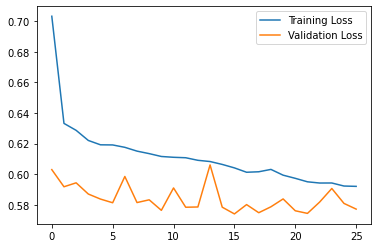

Normalized_test_loss: 0.5115634202957153
Denormalized_test_loss: 0.7190801501274109
Saved model to ./saved_models/timesteps/input9_output6_loss0.7190801501274109


Input Timesteps: 10, Output Timesteps: 2


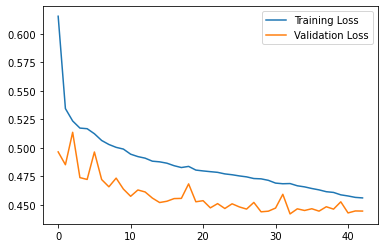

Normalized_test_loss: 0.4098537862300873
Denormalized_test_loss: 0.6457805037498474
Saved model to ./saved_models/timesteps/input10_output2_loss0.6457805037498474


Input Timesteps: 10, Output Timesteps: 3


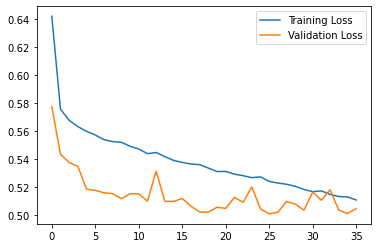

Normalized_test_loss: 0.4568856656551361
Denormalized_test_loss: 0.6794513463973999
Saved model to ./saved_models/timesteps/input10_output3_loss0.6794513463973999


Input Timesteps: 10, Output Timesteps: 4


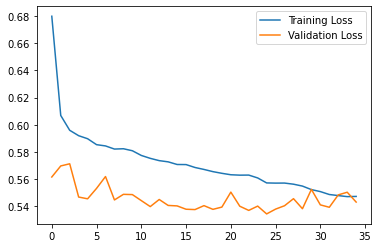

Normalized_test_loss: 0.47893938422203064
Denormalized_test_loss: 0.6956497430801392
Saved model to ./saved_models/timesteps/input10_output4_loss0.6956497430801392


Input Timesteps: 10, Output Timesteps: 5


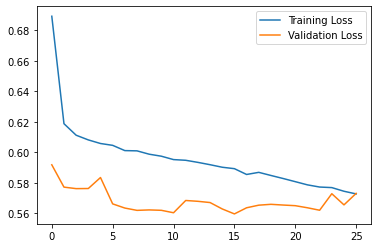

Normalized_test_loss: 0.5021529793739319
Denormalized_test_loss: 0.7124403119087219
Saved model to ./saved_models/timesteps/input10_output5_loss0.7124403119087219


Input Timesteps: 10, Output Timesteps: 6


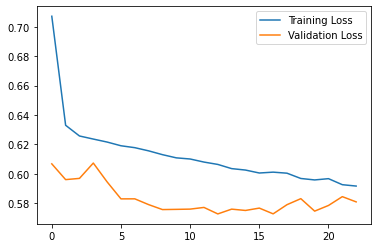

Normalized_test_loss: 0.5142042636871338
Denormalized_test_loss: 0.720687747001648
Saved model to ./saved_models/timesteps/input10_output6_loss0.720687747001648


Input Timesteps: 11, Output Timesteps: 2


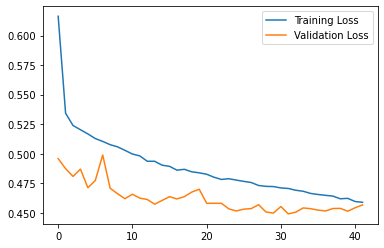

Normalized_test_loss: 0.4135496914386749
Denormalized_test_loss: 0.6464254260063171
Saved model to ./saved_models/timesteps/input11_output2_loss0.6464254260063171


Input Timesteps: 11, Output Timesteps: 3


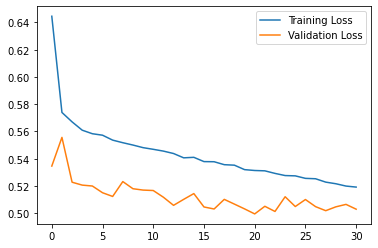

Normalized_test_loss: 0.4554869532585144
Denormalized_test_loss: 0.678413450717926
Saved model to ./saved_models/timesteps/input11_output3_loss0.678413450717926


Input Timesteps: 11, Output Timesteps: 4


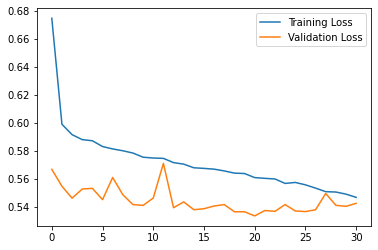

Normalized_test_loss: 0.4808463752269745
Denormalized_test_loss: 0.6971668601036072
Saved model to ./saved_models/timesteps/input11_output4_loss0.6971668601036072


Input Timesteps: 11, Output Timesteps: 5


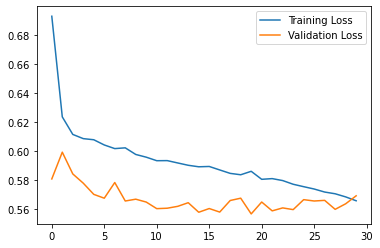

Normalized_test_loss: 0.49679139256477356
Denormalized_test_loss: 0.708382785320282
Saved model to ./saved_models/timesteps/input11_output5_loss0.708382785320282


Input Timesteps: 11, Output Timesteps: 6


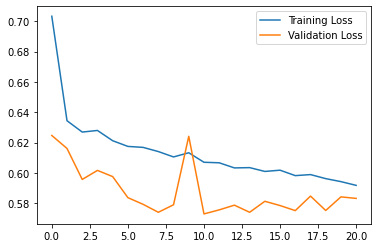

Normalized_test_loss: 0.510836660861969
Denormalized_test_loss: 0.7184013724327087
Saved model to ./saved_models/timesteps/input11_output6_loss0.7184013724327087




In [6]:
for num_timesteps_input in num_timesteps_inputs:
    for num_timesteps_output in num_timesteps_outputs:
        print(f"Input Timesteps: {num_timesteps_input}, Output Timesteps: {num_timesteps_output}")
        
        #Getting the Data
        training_input, training_target = preprocessing_utils.generate_dataset(train_original_data,
                                                   num_timesteps_input=num_timesteps_input,
                                                           num_timesteps_output=num_timesteps_output)
        val_input, val_target = preprocessing_utils.generate_dataset(val_original_data,
                                                 num_timesteps_input=num_timesteps_input,
                                                 num_timesteps_output=num_timesteps_output)
        test_input, test_target = preprocessing_utils.generate_dataset(test_original_data,
                                                   num_timesteps_input=num_timesteps_input,
                                                   num_timesteps_output=num_timesteps_output)

        adj_mat = preprocessing_utils.get_normalized_adj(A)
        adj_mat = torch.from_numpy(adj_mat).to(device)
        
        #Init model
        stgcn = model.Stgcn_Model(nodes_num = adj_mat.shape[0], features_num = training_input.shape[3],
                            input_timesteps = num_timesteps_input, num_output = num_timesteps_output).to(device = device)

        optimizer = torch.optim.Adam(stgcn.parameters(), lr = lr)
        loss_criterion = nn.MSELoss()

        best_loss = float("inf")
        early_stop = 0
        best_weights = None

        training_loss = []
        validation_loss = []
        
        #Train
        pbar = tqdm(range(epochs))
        for epoch in pbar:

            pbar.set_description(f"Epoch {epoch}")

            loss = train(training_input, training_target, batch_size)
            training_loss.append(loss)

            with torch.no_grad():
                val_loss = model_utils.validate(stgcn, loss_criterion, val_input, val_target, adj_mat, batch_size, device)
                validation_loss.append(val_loss.item())

            pbar.set_postfix(training_loss=loss, validation_loss=val_loss.item())

            if val_loss < best_loss:
                early_stop = 0
                best_loss = val_loss
                best_weights = copy.deepcopy(stgcn.state_dict())
            else:
                early_stop += 1

            if early_stop == patience:
                stgcn.load_state_dict(best_weights)
                break


        #For Model saving purposes
        stgcn.lr = lr 
        stgcn.nodes_num = adj_mat.shape[0]
        stgcn.features_num = training_input.shape[3]
        stgcn.input_timesteps = num_timesteps_input
        stgcn.num_output = num_timesteps_output
        
        #Plot loss
        plt.plot(training_loss, label = 'Training Loss')
        plt.plot(validation_loss, label = 'Validation Loss')
        plt.legend()
        plt.show()
        
        torch.manual_seed(1234)


        with torch.no_grad():
            results = model_utils.predict(stgcn, test_input, adj_mat)
            normalized_test_loss = model_utils.validate(stgcn, loss_criterion, test_input, test_target, adj_mat, batch_size, device)
            print("Normalized_test_loss: {}".format(normalized_test_loss))
            denormalized_rmse_loss = get_test_rmse(results, test_target, stds, means, loss_criterion).item()
            print("Denormalized_test_loss: {}".format(denormalized_rmse_loss))
            
        path = model_utils.save_model_timesteps(stgcn,optimizer,num_timesteps_input,
                                        num_timesteps_output, denormalized_rmse_loss)
        print('Saved model to {}\n\n'.format(path))
        